In [ ]:
#Assignment 3: : Download Abalone dataset. (URL: http://archive.ics.uci.edu/ml/datasets/Abalone)
# a) Predict the number of rings either as a continuous value or as a classification problem.
# b) Predict the age of abalone from physical measurements using linear regression
#Name: Adwait Nitin Deshpande
#Class: TE-AIML
#Roll No: 33514

In [1]:
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [2]:
# Load the dataset into a Pandas dataframe and add column names
import pandas as pd

names = ['sex', 'length', 'diameter', 'height', 'whole_weight',
         'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('abalone.data', names=names)


In [3]:
# Preprocess the data by converting the sex column to a one-hot encoded categorical variable
df = pd.get_dummies(df, columns=['sex'])

In [4]:
# Split the dataset into training and testing sets and define the target variable as whether the 
# number of rings is less than or equal to 10 or greater than 10.

from sklearn.model_selection import train_test_split

X = df.drop(['rings'], axis=1)
y = df['rings'].apply(lambda x: 1 if x > 10 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train a logistic regression model to classify the rings
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7739234449760766


In [6]:
# For the linear regression problem, 
# we will define the target variable as the age of the abalone and split the dataset into training and testing sets
X = df.drop(['rings'], axis=1)
y = df['rings'] + 1.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Train a linear regression model to predict the age
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
mse = ((y_test - reg.predict(X_test)) ** 2).mean()
print("Mean Squared Error:", mse)


Mean Squared Error: 4.895665510989833


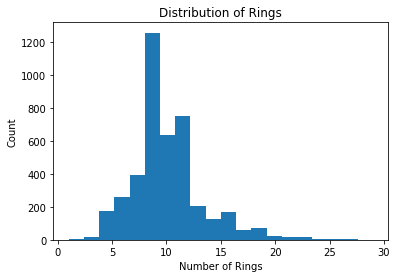

In [8]:
# Histogram to visualize the distribution of the target variable (number of rings)
import matplotlib.pyplot as plt

plt.hist(df['rings'], bins=20)
plt.xlabel('Number of Rings')
plt.ylabel('Count')
plt.title('Distribution of Rings')
plt.show()


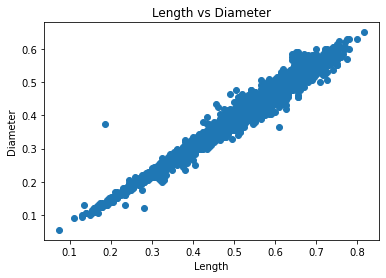

In [9]:
# A scatter plot to visualize the correlation between two variables, such as length and diameter
plt.scatter(df['length'], df['diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Length vs Diameter')
plt.show()


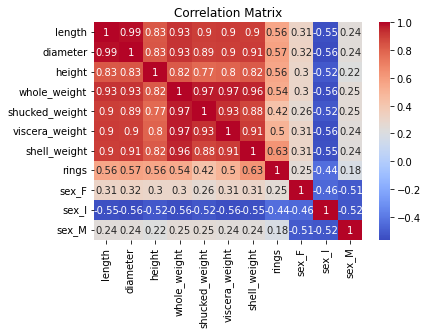

In [10]:
# A heatmap to visualize the correlation matrix of all the variables
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


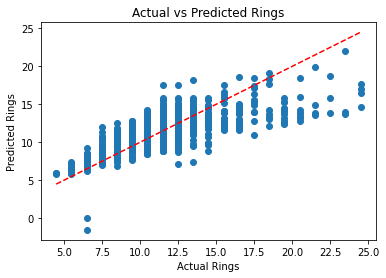

In [14]:
y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Rings')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.show()


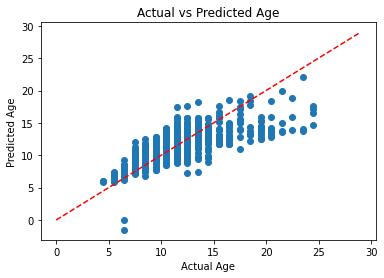

In [13]:
import numpy as np

y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot(np.arange(0, 30), np.arange(0, 30), 'r--')
plt.title('Actual vs Predicted Age')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.show()
